<a href="https://colab.research.google.com/github/Sara19598/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [198]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the libraries-**


In [199]:
#Importing libraries for Exploratory data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [200]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis - Poonam Shevkar/Hotel Bookings.csv')


**First five values of dataset of Hotel Booking analysis**

In [201]:
HBA.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [202]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [203]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [204]:
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [205]:
len(HBA.columns)

32

In [206]:
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [207]:
HBA.shape

(119390, 32)

In [208]:
type(HBA)

pandas.core.frame.DataFrame

In [209]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [210]:
# so as the count of null values in company column is huge so better to drop it
HBA.drop('company',axis=1,inplace=True)
HBA.shape

(119390, 31)

In [211]:
# the next is agent with big number of null values in it.
HBA['agent'].unique()



array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [212]:
HBA['agent'].mean()

86.69338185346919

In [213]:
# we will replace the nans with mean.
HBA['agent'].fillna(value= HBA['agent'].mean(),inplace=True)
HBA['agent'].isnull().sum()

0

In [214]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)

In [215]:
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [216]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1cd23a7310>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

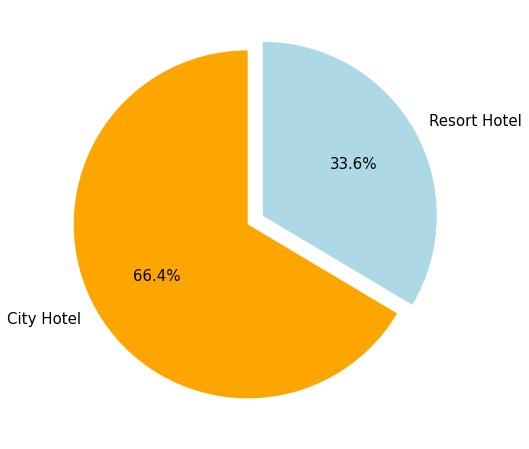

In [217]:
plt.rcParams['figure.figsize']=8,8
labels=hotel_type.index.tolist()
sizes=hotel_type.tolist()
explode=(0,0.1)
colors=['orange','lightblue']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})

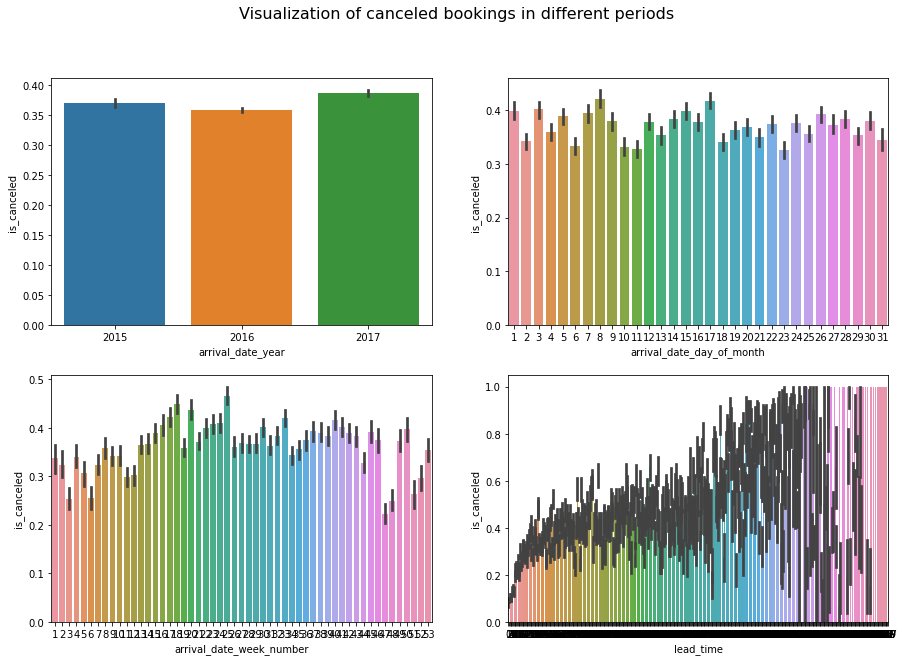

In [218]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Visualization of canceled bookings in different periods', fontsize=16)
sns.barplot(HBA['arrival_date_year'],HBA['is_canceled'],ax=axes[0,0])
sns.barplot(HBA['arrival_date_day_of_month'],HBA['is_canceled'],ax=axes[0,1])
sns.barplot(HBA['arrival_date_week_number'],HBA['is_canceled'],ax=axes[1,0])
sns.barplot(HBA['lead_time'],HBA['is_canceled'],ax=axes[1,1])
plt.show()


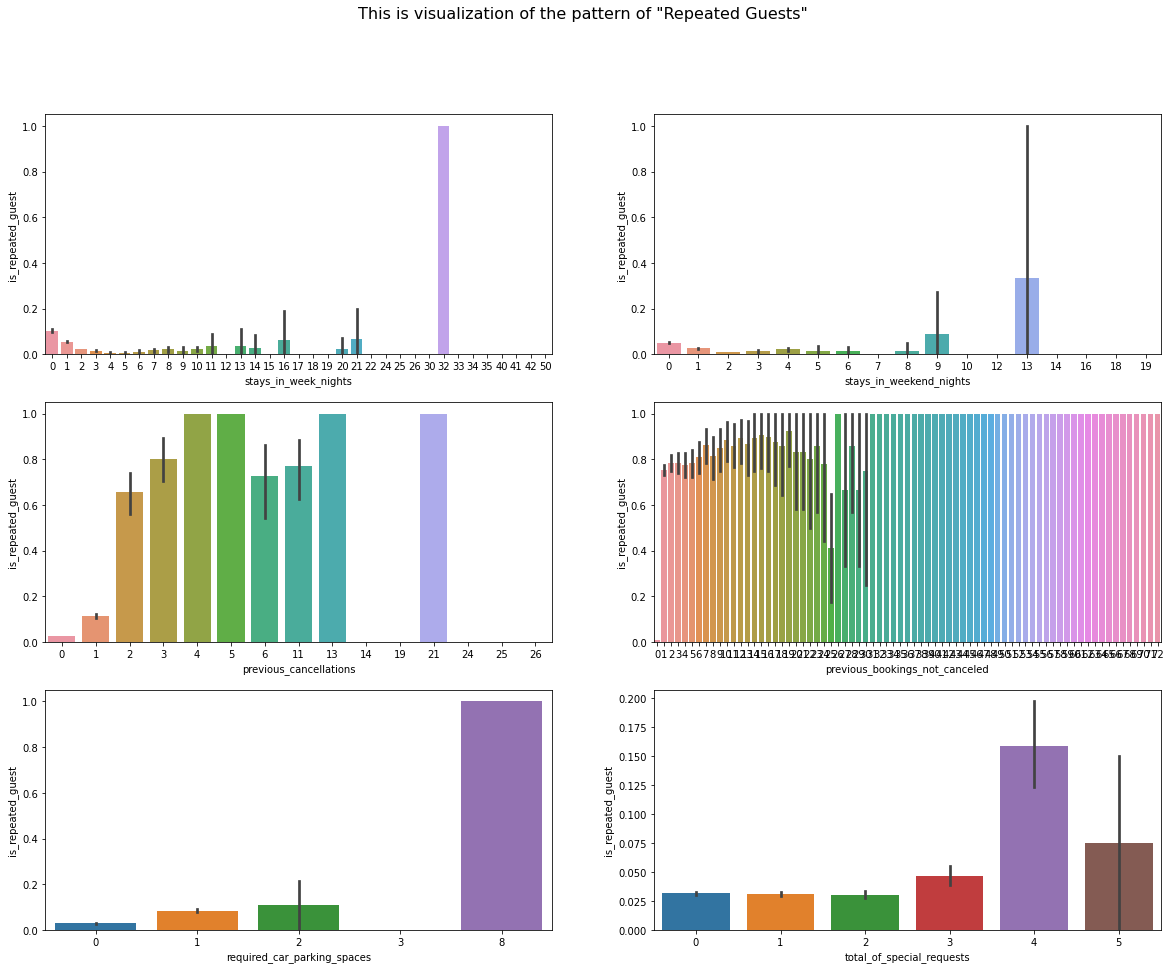

In [219]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('This is visualization of the pattern of "Repeated Guests" ', fontsize=16)
sns.barplot(HBA['stays_in_week_nights'],HBA['is_repeated_guest'],ax=axes[0,0])
sns.barplot(HBA['stays_in_weekend_nights'],HBA['is_repeated_guest'],ax=axes[0,1])
sns.barplot(HBA['previous_cancellations'],HBA['is_repeated_guest'],ax=axes[1,0])
sns.barplot(HBA['previous_bookings_not_canceled'],HBA['is_repeated_guest'],ax=axes[1,1])
sns.barplot(HBA['required_car_parking_spaces'],HBA['is_repeated_guest'],ax=axes[2,0])
sns.barplot(HBA['total_of_special_requests'],HBA['is_repeated_guest'],ax=axes[2,1])
plt.show()

DATA PREPROCESSING

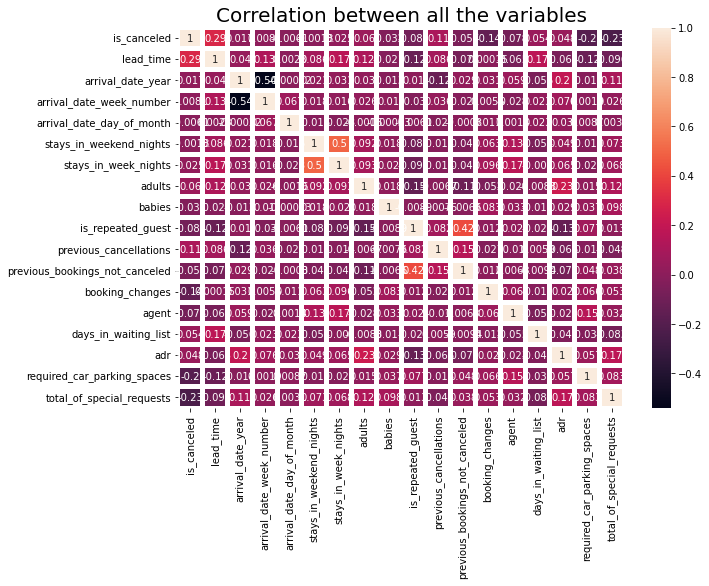

In [220]:
plt.figure(figsize=(10,7))
sns.heatmap(HBA.corr(), annot=True,linewidths=4)
plt.title('Correlation between all the variables',size=20)
plt.show() 

In [221]:
corr=HBA.corr()
corr
correlation = HBA.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.077992
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [222]:
# dropping coloumns that are not useful.
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
HBA.drop(useless_col, axis = 1, inplace = True)

In [223]:
HBA.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,No Deposit,86.693382,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,No Deposit,86.693382,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0,0,BB,Direct,Direct,0,0,0,A,No Deposit,86.693382,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.000000,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.000000,Transient,98.0,0,1,2015-07-03


In [224]:
#creating numerical and categorical data frames.
cat_cols = [col for col in HBA.columns if HBA[col].dtype == 'O']
cat_cols

['hotel',
 'arrival_date_month',
 'children',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [225]:

cat_HBA = HBA[cat_cols]
cat_HBA.head()

,hotel,arrival_date_month,children,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,0,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,0,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,0,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,0,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,0,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [226]:
cat_HBA['reservation_status_date'] = pd.to_datetime(cat_HBA['reservation_status_date'])

cat_HBA['year'] = cat_HBA['reservation_status_date'].dt.year
cat_HBA['month'] = cat_HBA['reservation_status_date'].dt.month
cat_HBA['day'] = cat_HBA['reservation_status_date'].dt.day
cat_HBA.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)
cat_HBA.head()

,hotel,children,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,0,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,0,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,0,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [227]:
# printing unique values of each column
for col in cat_HBA.columns:
    print(f"{col}: \n{cat_HBA[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

children: 
[0.0 1.0 2.0 10.0 3.0 'unknown']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [228]:
# encoding categorical variables

cat_HBA['hotel'] = cat_HBA['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_HBA['meal'] = cat_HBA['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_HBA['market_segment'] = cat_HBA['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_HBA['distribution_channel'] = cat_HBA['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
cat_HBA['reserved_room_type'] = cat_HBA['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,'L': 7, 'B': 8})

cat_HBA['deposit_type'] = cat_HBA['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_HBA['customer_type'] = cat_HBA['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_HBA['year'] = cat_HBA['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
cat_HBA.head()

,hotel,children,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,0,1.0,0,0,0,7,2
3,0,0,0,1,1,1.0,0,0,0,7,2
4,0,0,0,2,2,1.0,0,0,0,7,3


In [229]:
num_HBA = HBA.drop(columns = cat_cols, axis = 1)
num_HBA.drop('is_canceled', axis = 1, inplace = True)
num_HBA

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0,0,0,0,86.693382,0.00,0,0
1,737,27,1,0,0,2,0,0,0,0,86.693382,0.00,0,0
2,7,27,1,0,1,1,0,0,0,0,86.693382,75.00,0,0
3,13,27,1,0,1,1,0,0,0,0,304.000000,75.00,0,0
4,14,27,1,0,2,2,0,0,0,0,240.000000,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0,0,0,0,394.000000,96.14,0,0
119386,102,35,31,2,5,3,0,0,0,0,9.000000,225.43,0,2
119387,34,35,31,2,5,2,0,0,0,0,9.000000,157.71,0,4
119388,109,35,31,2,5,2,0,0,0,0,89.000000,104.40,0,0


In [230]:
num_HBA.var()

lead_time                         11419.721511
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
agent                             10591.547972
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [239]:
# normalizing numerical variables

num_HBA['lead_time'] = np.log(num_HBA['lead_time'] + 1)
num_HBA['arrival_date_week_number'] = np.log(num_HBA['arrival_date_week_number'] + 1)
num_HBA['arrival_date_day_of_month'] = np.log(num_HBA['arrival_date_day_of_month'] + 1)
num_HBA['agent'] = np.log(num_HBA['agent'] + 1)
num_HBA['adr'] = np.log(num_HBA['adr'] + 1)

In [232]:
num_HBA.var()

lead_time                            2.591420
arrival_date_week_number             0.441039
arrival_date_day_of_month            0.506267
stays_in_weekend_nights              0.997229
stays_in_week_nights                 3.641554
adults                               0.335543
babies                               0.009494
is_repeated_guest                    0.030894
previous_cancellations               0.712904
previous_bookings_not_canceled       2.242317
agent                                2.331243
adr                               2553.866100
required_car_parking_spaces          0.060168
total_of_special_requests            0.628529
dtype: float64

In [240]:
num_HBA['adr'] = num_HBA['adr'].fillna(value = num_HBA['adr'].mean())
num_HBA.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0.728719,0.643236,0.352793,0,0,2,0,0,0,0,0.689764,0.000000,0,0
1,0.745798,0.643236,0.352793,0,0,2,0,0,0,0,0.689764,0.000000,0,0
2,0.561701,0.643236,0.352793,0,1,1,0,0,0,0,0.689764,4.330733,0,0
3,0.603936,0.643236,0.352793,0,1,1,0,0,0,0,0.725847,4.330733,0,0
4,0.608388,0.643236,0.352793,0,2,2,0,0,0,0,0.719849,4.595120,0,1


In [241]:
X = pd.concat([cat_HBA, num_HBA], axis = 1)
y = HBA['is_canceled']
X.shape, y.shape

((119390, 25), (119390,))

In [247]:
# splitting data into training set and test set
HBA.fillna(0, inplace = True)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.30)
X_train.head()

,hotel,children,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
60217,1,0,0,5,2,1.0,3,0,2,4,4,0.723525,0.666498,0.561701,1,2,2,0,0,0,0,0.689764,4.615121,0,0
21675,0,0,0,2,2,1.0,0,0,2,3,7,0.633188,0.587191,0.514321,1,2,2,0,0,0,0,0.719849,3.891820,0,1
69262,1,0,0,3,2,1.0,3,0,3,5,28,0.703119,0.633188,0.644951,2,2,2,0,0,0,0,0.644951,4.605170,0,0
82233,1,0,0,5,2,1.0,3,0,0,12,23,0.715402,0.635427,0.441230,0,3,2,0,0,1,0,0.352793,4.189655,0,0
57310,1,0,0,0,0,1.0,0,0,2,9,23,0.441230,0.659697,0.635427,0,2,1,0,0,0,0,0.689764,4.795791,0,0


In [248]:
X_test.head()

,hotel,children,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
25203,0,0,0,3,2,2.0,0,1,2,6,18,0.710159,0.637540,0.593458,2,5,3,0,0,0,0,0.660763,4.476427,0,2
84225,1,0,0,1,2,1.0,0,2,2,2,21,0.694140,0.571637,0.625561,0,2,2,0,0,0,0,0.689764,4.465908,0,0
3720,0,0,0,0,0,2.0,0,0,2,1,3,0.681860,0.672071,0.649646,0,3,2,0,0,0,0,0.689764,5.049728,0,2
9094,0,0,0,2,2,2.0,0,2,2,7,2,0.699435,0.664700,0.643236,2,5,2,0,0,0,0,0.719849,4.033001,0,0
23066,0,0,0,2,2,1.0,0,0,2,4,15,0.692797,0.612429,0.580005,2,4,2,0,0,0,0,0.720066,3.974058,0,1


In [243]:
y_train.head()

105003    0
108315    0
35398     0
19062     0
112195    0
Name: is_canceled, dtype: int64

In [244]:
y_test.head()

62233    1
59749    1
6501     1
96641    0
26191    0
Name: is_canceled, dtype: int64